#Предобработка данны

##Пропущенные значения

В реальных задачах значения некоторых признаков у некоторых объектов отсутствуют. Это может происходить по разным причинам: ошибки при записи данных, отказ респондента отвечать на вопрос, невозможность описать конкретное свойство у конкретного объекта (в таблице с данными об автомобилях будут пропуски у электромобилей в графе <<объём топливного бака>>). Многие алгоритмы машинного обучения (в частности, линейная регрессия) не могут работать с пропущенными данными, поэтому эти пропуски необходимо заполнить.

Заполнять пропуски у объектов можно различными способами:
* Константным уникальным значением "--- неудачный вариант для линейных методов (модель начнёт считать пропуск близким к некоторому другому значению выборки), но быстрый и популярный способ с другими алгоритмами в машинном обучении.
* Средним арифметическим, медианой, модой "--- сохранение статистик выборки, но потеря информации о наличии пропуска в данных.
* Предсказаниями другого алгоритма "--- затратно по времени (однако всё равно не приносит новой информации в датасет, хотя и может положительно сказаться на общем качестве).


Заметим, что в некоторых случаях наличие пропуска в данных несёт определённую информацию об объекте (например, отказ в ответе на вопрос о доходах клиента банка), поэтому полезно добавлять новые признаки "--- индикаторы пропусков. Иногда признаки содержат слишком много пропусков и их выгоднее удалить.

Добавление индикаторов пропусков даёт интересную возможность. Допустим, у нас встречаются пропуски в признаке $x_1$,
и мы добавляем второй признак с соответствующим индикатором:
$$
    a(x)
    =
    w_0
    +
    w_1 x_1
    +
    w_2 [\text{был пропуск в} x_1]
    +
    \dots
$$
Заметим, что если мы заменяем пропуски в $x_1$ на какую-то константу, то $w_2$, по сути, может скорректировать эту константу.
Получается, что добавление индикатора позволяет выучить оптимальную константу для замены пропусков.


##Выбросы




На практике могут встречаться объекты, сильно отличающиеся от остальных. Их называют выбросами. Отличия могут выражаться как в значениях признаков, так и в целовой величине. Причины бывают различными: ошибки в заполнении данных (добавили лишний ноль), <<исключительность>> отдельных объектов (низкие цены на дома могут быть связаны с попыткой обхода налогов, а не с их характеристиками). Выбросы могут сильно сказываться на решении "--- например, квадратичная функция ошибок <<реагирует>> на выбросы и линейная регрессия с таким функционалом ошибки отклоняется в их сторону, в отличие от модели, оптимизирующей среднюю абсолютную ошибку (рис. 1).


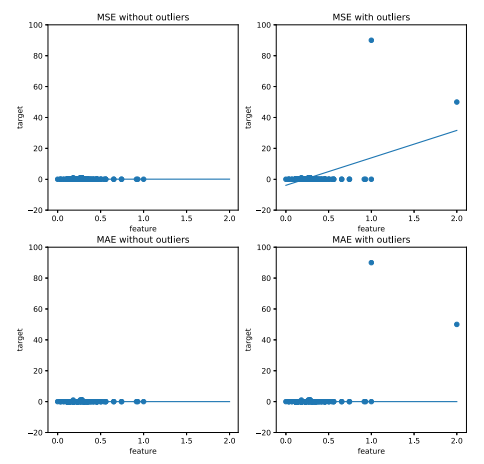



Искать выбросы можно следующим образом. Выбросы в признаках можно обнаружить, исследуя распределение признаков и в особенности хвосты распределений. Выбросы в целевой величине можно искать, считая ошибку предсказания модели на объектах обучающей выборки (вспомогательная модель не должна наблюдать при обучении проверяемый объект). Если ошибка велика (алгоритм с уверенностью предсказывает отрицательный класс, хотя метка у объекта положительная), то объект можно считать выбросом (если, конечно, дело не в плохой модели). Объекты-выбросы чаще всего не корректируют, а удаляют из выборки.

Заметим, что не всегда необходимо удалять объекты-выбросы из выборки. В одном
[конкурсе](https://habr.com/company/ods/blog/336168/)
 помог следующий подход: оставить выбросы, чтобы не изменилось среднее предсказание алгоритма, при этом качество модели считать только по <<нормальным>> объетам, чтобы исключить шум от объектов-выбросов.

Как уже было сказано выше, некоторые функции потерь чувствительнее относятся в выбросам, поэтому в таких ситуациях имеет смысл использовать более устойчивые функции потерь для обучения моделей.


Пример на Python, демонстрирующий обнаружение выбросов с использованием библиотеки Pandas и Matplotlib:

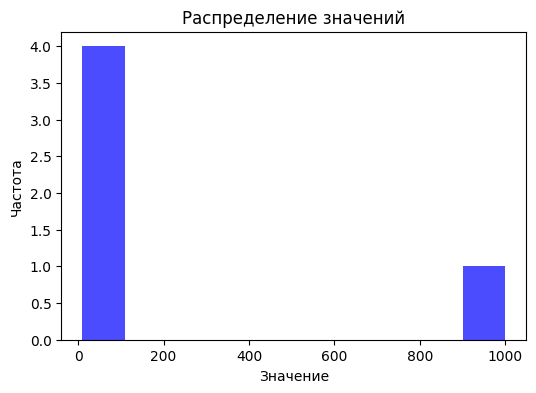

Выбросы:
   value
4   1000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Создание фрейма данных с выбросами
data = {'value': [10, 15, 12, 14, 1000]}
df = pd.DataFrame(data)

# Визуализация распределения значений
plt.figure(figsize=(6,4))
plt.hist(df['value'], bins=10, alpha=0.7, color='blue')
plt.title('Распределение значений')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

# Обнаружение выбросов
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]
print('Выбросы:')
print(outliers)

Примеры использования qq-графика (Quantile-Quantile plot) для оценки нормальности распределения данных с использованием библиотеки Python seaborn:

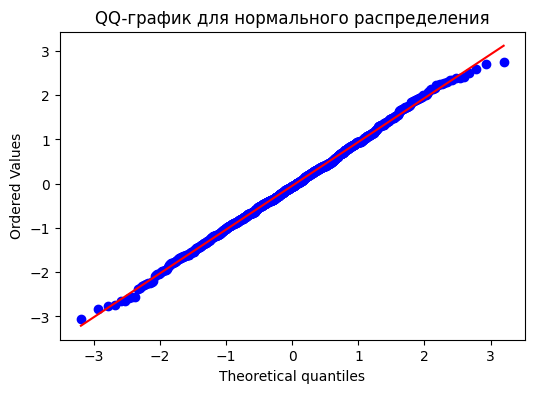

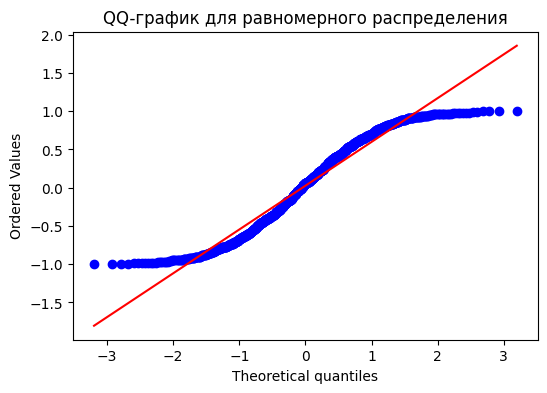

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Генерация случайных данных из нормального распределения
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Создание qq-графика для оценки нормальности распределения
plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ-график для нормального распределения')
plt.show()

# Генерация случайных данных из равномерного распределения
data_uniform = np.random.uniform(low=-1, high=1, size=1000)

# Создание qq-графика для оценки нормальности распределения
plt.figure(figsize=(6, 4))
stats.probplot(data_uniform, dist="norm", plot=plt)
plt.title('QQ-график для равномерного распределения')
plt.show()

## Обработка категориальных признаков

Часто в данных встречаются признаки, которые имеют категориальную природу. Если они представлены в виде чисел, то использование их напрямую в модели может неверно интерпретировать порядок между этими категориями. Например, если красный цвет кодируется как "1", зеленый как "2", а синий как "3", то модель будет считать зеленый цвет находящимся между красным и синим. Если же категориальный признак представлен в выборке не в виде чисел, то его нельзя использовать для обучения модели. Давайте рассмотрим способы кодирования категориальных признаков.



### Label encoding

В простом случае, если категориальный признак представлен в виде нечисловых данных, можно построить обратимое отображение для каждого уникального значения в числовое представление. Это позволит использовать признак для обучения модели. Например, зеленому цвету будет соответствовать "1", красному - "2" и так далее.

У этого подхода есть две основные проблемы: установление порядка между категориями и работа с неизвестными значениями категориального признака в процессе обучения (такие случаи требуется обрабатывать отдельно).



 Примеры на Python для обработки категориальных признаков с использованием библиотек pandas и scikit-learn:

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный']}
df = pd.DataFrame(data)

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder к категориальному столбцу
df['цвет_код'] = label_encoder.fit_transform(df['цвет'])

# Вывод закодированных данных
print(df)

      цвет  цвет_код
0  красный         1
1  зеленый         0
2    синий         2
3  красный         1


### One-hot encoding

Другой способ заключается в добавлении индикаторных признаков для каждого уникального значения категориального признака. Например, появятся новые бинарные признаки: "красный цвет", "зеленый цвет" и так далее. Этот подход решает проблему установления порядка между категориями и работы с новыми значениями категориального признака (у таких объектов будут "нули" по всем индикаторным признакам).

Проблема этого подхода заключается в увеличении количества признаков (что затрачивает память и увеличивает время обучения модели) пропорционально количеству категорий. Эти разреженные признаки можно хранить в виде разреженных матриц, но не все алгоритмы могут с ними работать. Также для экономии памяти можно не создавать признаки для редко встречающихся категорий.

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный']}
df = pd.DataFrame(data)

# Инициализация OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Преобразование категориального столбца в бинарные признаки
onehot_encoded = onehot_encoder.fit_transform(df[['цвет']])

# Создание нового фрейма данных с бинарными признаками
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['цвет']))

# Объединение с исходным фреймом данных
df = pd.concat([df, onehot_df], axis=1)

# Вывод закодированных данных
print(df)

      цвет  цвет_зеленый  цвет_красный  цвет_синий
0  красный           0.0           1.0         0.0
1  зеленый           1.0           0.0         0.0
2    синий           0.0           0.0         1.0
3  красный           0.0           1.0         0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Кодирование с учётом целевой переменной

Более сложный метод кодирования категориальных признаков "--- через целевую переменную.
Идея в том, что алгоритму для предсказания цены необходимо знать не конкретный цвет автомобиля,
а то, как этот цвет сказывается на цене.
Разберём сначала базовый подход--- mean target encoding (иногда его называют <<счётчиками>>).

Заменим каждую категорию на среднее значение целевой переменной по всем объектам этой категории.
Пусть $j$-й признак является категориальным.
Для бинарной классификации новый признак будет выглядеть следующим образом:
$$
    g_j(x, X)
    =
    \frac{
        \sum_{i=1}^{\ell}
            [f_j(x) = f_j(x_i)][y_i = +1]
    }{
        \sum_{i=1}^{\ell}
            [f_j(x) = f_j(x_i)]
    }, \qquad \qquad (1)
$$
где $f_j(x_i)$ -- $j$-й признак $i$-го объекта, $y_i$ -- класс $i$-го объекта.

Отметим, что эту формулу легко перенести как на случай многоклассовой классификации (в этом случае
будем считать $K$ признаков, по одному для каждого класса, и в числителе будет подсчитывать долю
объектов с заданной категорией и с заданным классом),
так и на случай регрессии (будем вычислять среднее значение целевой переменной среди объектов данной категории).


In [6]:
import pandas as pd

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный'],
        'цена': [5000, 8000, 6000, 5500]}
df = pd.DataFrame(data)

# Вычисление среднего значения целевой переменной для каждой категории
mean_target_encoding = df.groupby('цвет')['цена'].mean().to_dict()

# Применение среднего значения категории к исходному датасету
df['цвет_код'] = df['цвет'].map(mean_target_encoding)

# Вывод закодированных данных
print(df)

      цвет  цена  цвет_код
0  красный  5000    5250.0
1  зеленый  8000    8000.0
2    синий  6000    6000.0
3  красный  5500    5250.0


**Mean Target Encoding**

In [8]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [12]:
import pandas as pd
import category_encoders as ce

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный'],
        'цена': [5000, 8000, 6000, 5500]}
df = pd.DataFrame(data)

# Инициализация MeanTargetEncoder
mean_target_encoder = ce.target_encoder.TargetEncoder(cols='цвет')

# Применение Mean Target Encoding к категориальному столбцу
df_encoded = mean_target_encoder.fit_transform(df['цвет'], df['цена'])

# Вывод закодированных данных
print(df_encoded)

# Применение Mean Target Encoding к категориальному столбцу
df_encoded = mean_target_encoder.fit_transform(df['цвет'], df['цена'])

# Объединение закодированного столбца с исходным DataFrame
df = df.join(df_encoded.add_suffix('_encoded'))

# Вывод общего DataFrame
print(df)

          цвет
0  6000.880318
1  6368.953389
2  6108.736441
3  6000.880318
      цвет  цена  цвет_encoded
0  красный  5000   6000.880318
1  зеленый  8000   6368.953389
2    синий  6000   6108.736441
3  красный  5500   6000.880318


In [18]:
import pandas as pd
import category_encoders as ce

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный'],
        'цена': [5000, 8000, 6000, 5500]}
df = pd.DataFrame(data)

# Инициализация CatBoostEncoder
catboost_encoder = ce.cat_boost.CatBoostEncoder(cols='цвет')

# Применение CatBoost Encoding к категориальному столбцу
df_encoded = catboost_encoder.fit_transform(df['цвет'], df['цена'])

# Вывод закодированных данных
print(df_encoded)

# Объединение закодированного столбца с исходным DataFrame
df = pd.merge(df, df_encoded, left_index=True, right_index=True)

# Вывод общего DataFrame
print(df)

     цвет
0  6125.0
1  6125.0
2  6125.0
3  5562.5
    цвет_x  цена  цвет_y
0  красный  5000  6125.0
1  зеленый  8000  6125.0
2    синий  6000  6125.0
3  красный  5500  5562.5


Вернёмся к бинарной классификации.
Можно заметить, что для редких категорий мы получим некорректные средние значения целевой переменной.
Например, в выборке было только три золотистых автомобиля, которые оказались старыми и дешёвыми.
Из-за этого наш алгоритм начнёт считать золотистый цвет дешёвым.
Для исправления этой проблемы можно регуляризировать признак средним значением целевой переменной по всем категориям так,
чтобы у редких категорий значение было близко к среднему по всей выборке,
а для популярных к среднему значению по категории.
Формально для задачи бинарной классификации это выражается так:
$$
    g_j(x, X)
    =
    \frac{
        \sum_{i=1}^{\ell}
            [f_j(x) = f_j(x_i)][y_i = +1]
            +
            \frac{C}{\ell}
            \sum_{i=1}^{\ell}
            [y_i = +1]
    }{
        \sum_{i=1}^{\ell}
        [f_j(x) = f_j(x_i)] + C
    }, \qquad \qquad (2)
$$
где $C$ -- коэффициент, отвечающий за баланс между средним значением по категории и глобальным средним значением.

Однако если мы вычислим значения $g_j(x, X)$ по всей выборке,
то столкнёмся с переобучением, так как мы внесли информацию о целевой переменной
в признаки (новый признак слабая, но модель, предсказывающая целевое значение).
Поэтому вычисление таких признаков следует производить по блокам,
то есть вычислять средние значения на основе одних фолдов
для заполнения на другом блоке~(аналогично процессу кросс-валидации).
Если же ещё планируется оценка качества модели с помощью кросс-валидации по блокам,
то придётся применить <<двойную кросс-валидацию>> для подсчёта признаков.
Этот подход заключается в кодировании категориальных признаков по <<внутренним>> блокам внутри <<внешних>> блоков,
по которым оценивается качество модели.

Давайте рассмотрим пример на Python, демонстрирующий кодирование категориальных признаков с учётом целевой переменной и регуляризацией для бинарной классификации с использованием библиотеки category_encoders:

In [19]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Создание примера данных
data = {'цвет': ['красный', 'зеленый', 'синий', 'красный', 'золотистый', 'золотистый', 'золотистый'],
        'целевая_переменная': [1, 0, 1, 0, 1, 0, 0]}
df = pd.DataFrame(data)

# Инициализация MeanTargetEncoder с учётом редких категорий
kf = KFold(n_splits=3, shuffle=True, random_state=42)
rt_encoder = ce.TargetEncoder(cols='цвет', handle_unknown='value')

# Применение Mean Target Encoding к категориальному столбцу
df_encoded = rt_encoder.fit_transform(df['цвет'], df['целевая_переменная'])

print(df_encoded)

# Объединение закодированного столбца с исходным DataFrame
df = pd.merge(df, df_encoded, left_index=True, right_index=True)

# Вывод общего DataFrame
print(df)

       цвет
0  0.438704
1  0.372811
2  0.502919
3  0.438704
4  0.413860
5  0.413860
6  0.413860
       цвет_x  целевая_переменная    цвет_y
0     красный                   1  0.438704
1     зеленый                   0  0.372811
2       синий                   1  0.502919
3     красный                   0  0.438704
4  золотистый                   1  0.413860
5  золотистый                   0  0.413860
6  золотистый                   0  0.413860


Разберём этот процесс (иллюстрация на рис. 2).
Представим, что хотим посчитать качество модели на 3-м блоке. Для этого:

* Разбиваем все внешние блоки, кроме 3-го, на внутренние блоки.
Количество внутренних блоков может не совпадать с количеством внешних~(на иллюстрации их также 3).
* Рассмотрим конкретный внешний блок.
 Для каждого из его внутренних блоков считаем значение $g(x, X)$ на основе средних значений целевой переменной по блокам,  исключая текущий. Для 3-го внешнего блока (который сейчас играет роль тестовой выборки)        вычисляем~$g(x, X)$ как среднее вычисленных признаков по каждому из внутренних фолдов.
* Обучаем модель на всех блоках, кроме 3-го, делаем предсказание на 3-м и считаем на нём качество.



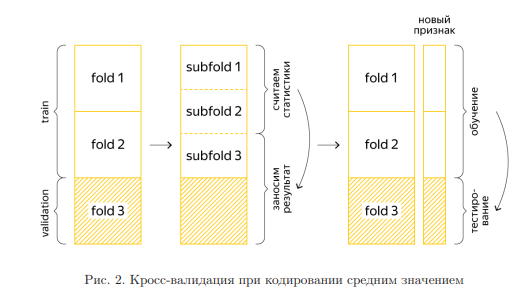


Существуют альтернативы кодированию категориальных признаков по блокам.

### Зашумление.
Можно посчитать новые признаки по базовой формуле 1,
а затем просто добавить к каждому значению случайный шум (например, нормальный).
Это действительно снизит уровень корреляции счётчиков с целевой переменной.
Проблема в том, что это делается за счёт снижения силы такого признака,
а значит, мы ухудшаем итоговое качество модели.
Поэтому важно подбирать дисперсию шума, чтобы соблюсти баланс между борьбой с переобучением
и предсказательной силой счётчиков.



### Сглаживание.
Можно немного модифицировать формулу (2),
чтобы сила регуляризации зависела от объёма данных по конкретной категории:
$$
    g_j(x, X)
    =
    \lambda \left( n(f_j(x)) \right)
    \frac{
        \sum_{i=1}^{\ell}
            [f_j(x) = f_j(x_i)][y_i = +1]
    }{
        \sum_{i=1}^{\ell}
        [f_j(x) = f_j(x_i)]
    }
    +
    \left( 1 - \lambda \left( n(f_j(x)) \right) \right)
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [y_i = +1]
    ,
$$
где $n(z) = \sum_{i = 1}^{\ell} [f_j(x_i) = z]$ --- число объектов категории $z$,
$\lambda(n)$ --- некоторая монотонно возрастающая функция, дающая значения из отрезка $[0, 1]$.
Примером может служить $\lambda(n) = \frac{1}{1 + \exp(-n)}$.
Если грамотно подобрать эту функцию, то она будет вычищать значение целевой переменной
из редких категорий и мешать переобучению.


In [21]:
import numpy as np

# Генерируем случайный датасет
np.random.seed(0)
X = np.random.rand(100, 2)  # Пример признакового пространства
y = np.random.choice([0, 1], size=100)  # Пример целевой переменной

# Определяем функцию сглаживания
def smoothing_function(g_j, x, X, lambda_func):
    n = np.sum([np.array_equal(x_i, x) for x_i in X])
    first_term = lambda_func(n) * np.sum([np.array_equal(x_i, x) and (y_i == 1) for x_i, y_i in zip(X, y)]) / np.sum([np.array_equal(x_i, x) for x_i in X])
    second_term = (1 - lambda_func(n)) * np.sum([y_i == 1 for y_i in y]) / len(y)
    return g_j(x, X) + first_term + second_term

# Пример функции lambda_func
def lambda_func(n):
    return 1 / (1 + np.exp(-n))

# Определяем функцию g_j
def g_j(x, X):
    # Пример: среднее значение целевой переменной для ближайших соседей объекта x в множестве X
    distances = [np.linalg.norm(x - x_i) for x_i in X]  # Вычисляем расстояния до каждого объекта в X
    nearest_neighbors_indices = np.argsort(distances)[:5]  # Индексы 5 ближайших соседей
    nearest_neighbors_y = [y[i] for i in nearest_neighbors_indices]  # Целевые переменные для ближайших соседей
    return np.mean(nearest_neighbors_y)  # Возвращаем среднее значение целевой переменной для ближайших соседей

# Применяем функцию сглаживания к случайному объекту из датасета
random_index = np.random.randint(len(X))
random_x = X[random_index]
result = smoothing_function(g_j, random_x, X, lambda_func)
print("Результат сглаживания для случайного объекта:", result)

Результат сглаживания для случайного объекта: 0.7344707106849975


### Кодирование по времени.
Можно отсортировать выборку некоторым образом и для~$i$-го объекта вычислять статистики только по предыдущим объектам:
$$
    g_j(x_k, X)
    =
    \frac{
        \sum_{i=1}^{k - 1}
            [f_j(x) = f_j(x_i)][y_i = +1]
    }{
        \sum_{i=1}^{k - 1}
            [f_j(x) = f_j(x_i)]
    }.
$$
Для хорошего качества имеет смысл отсортировать выборку случайным образом несколько раз,
и для каждого такого порядка посчитать свои счётчики.
Это даёт улучшение качества, например, потому что для объектов, находящихся в начале выборки,
признаки будут считаться по очень небольшой подвыборке, и поэтому вряд ли будут хорошо предсказывать
целевую переменную.
При наличии нескольких перестановок хотя бы один из новых признаков будет вычислен по подвыборке
достаточного размера.
Такой подход, например, используется в библиотеке CatBoost.


In [23]:
import pandas as pd

# Создание примера данных
data = {
    'f_j': ['A', 'B', 'A', 'C', 'B'],
    'y': [1, -1, 1, 1, -1]
}
df = pd.DataFrame(data)

# Функция для вычисления g_j(x_k, X)
def calculate_gj(k, df):
    numerator = sum(
        (df['f_j'].iloc[i] == df['f_j'].iloc[k]) and (df['y'].iloc[i] == 1)
        for i in range(k)
    )
    denominator = sum(df['f_j'].iloc[i] == df['f_j'].iloc[k] for i in range(k))
    if denominator == 0:
        return 0  # обработка случая деления на ноль
    else:
        return numerator / denominator

# Применение функции к данным
df['g_j'] = df.index.map(lambda k: calculate_gj(k, df))
print(df)

  f_j  y  g_j
0   A  1  0.0
1   B -1  0.0
2   A  1  1.0
3   C  1  0.0
4   B -1  0.0


### Weight of Evidence.
Существует альтернативный способ кодирования категориальных признаков, основанный на подсчёте соотношения
положительных и отрицательных объектов среди объектов данной категории.
Этот подход, в отличие от других, сложнее обобщить на многоклассовый случай или для регрессии.

Введём обозначение для доли объектов класса $b$ внутри заданной категории $c$ среди всех объектов данного класса в выборке:
$$
    P(c | y = b)
    =
    \frac{
        \sum_{i = 1}^{\ell}
            [y_i = b] [f_j(x_i) = c]
        +
        \alpha
    }{
        \sum_{i = 1}^{\ell}
            [y_i = b]
        +
        2 \alpha
    },
$$
где $\alpha$ --- параметр сглаживания.
Вычислим новое значение признака как
$$
    g_j(x, X)
    =
    \log\left(
        \frac{
            P(f_j(x) | y = +1)
        }{
            P(f_j(x) | y = -1)
        }
    \right).
$$
Если $g_j(x, X)$ близко к нулю, то данная категория примерно с одинаковой вероятностью
встречается в обоих классах, и поэтому вряд ли будет хорошо предсказывать значение целевой переменной.
Чем сильнее отличие от нуля, тем сильнее категория характеризует один из классов.

Разумеется, в конкретной задаче лучше всего может себя проявлять любой из этих подходов,
поэтому имеет смысл сравнивать их и выбирать лучший --- или использовать все сразу.


## Извлечение признаков из текстов

При решении некоторых задач мы сталкиваемся с тем, что объекты выборки целиком или частично описываются в виде текстов (под текстами имеем в виду строки, содержащие как минимум пару слов, иначе такой признак можно рассматривать как категориальный признак). Поэтому стоит задача представления текста в виде векторов чисел фиксированной длины.

### Bag-of-words

Простой способ заключается в подсчёте, сколько раз встретилось каждое слово в тексте. Получаем вектор длиной в количество уникальных слов, встречающихся во всех объектах выборки. В таком векторе много нулей, поэтому его удобнее хранить в разреженном виде. Такой способ представления текстов называют мешком слов.


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Пример текстовых данных
corpus = [
    'Это пример первого предложения.',
    'А это пример второго предложения.',
    'И наконец, пример третьего предложения.'
]

# Создание объекта CountVectorizer
vectorizer = CountVectorizer()

# Преобразование текста в мешок слов
X = vectorizer.fit_transform(corpus)

# Вывод уникальных слов
print(vectorizer.get_feature_names_out())

# Вывод разреженной матрицы мешка слов
print(X.toarray())

['второго' 'наконец' 'первого' 'предложения' 'пример' 'третьего' 'это']
[[0 0 1 1 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 0 1 1 1 0]]


### TF-IDF

Очевидно, что не все слова полезны в задаче прогнозирования. Например, мало информации несут слова, встречающиеся во всех текстах. Это могут быть как стоп-слова, так и слова, свойственные всем текстам выборки (в текстах про автомобили употребляется слово <<автомобиль>>). Эту проблему решает TF-IDF преобразование текста. Вычисляются две величины:

TD (Term Frequency) "--- количество вхождений слова в отношении к общему числу слов в тексте:

$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ "--- количество вхождений слова $t$ в текст $d$.

IDF (Inverse Document Frequency):

$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ "--- количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Это и будем значением нового признака (вместо количества каждого слова в тексте в случае мешка слов). Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример коллекции текстов
corpus = [
    'Это пример первого текста.',
    'Это пример второго текста.',
    'Еще один пример текста.',
    'Последний пример для коллекции.'
]

# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer()

# Вычисление TF-IDF для коллекции текстов
X = vectorizer.fit_transform(corpus)

# Вывод результата
print(X)

  (0, 8)	0.42075315164463567
  (0, 5)	0.6591911178676787
  (0, 7)	0.3439932714296342
  (0, 9)	0.5197138488789809
  (1, 0)	0.6591911178676787
  (1, 8)	0.42075315164463567
  (1, 7)	0.3439932714296342
  (1, 9)	0.5197138488789809
  (2, 4)	0.6108781210948048
  (2, 2)	0.6108781210948048
  (2, 8)	0.3899155916311765
  (2, 7)	0.318781545479458
  (3, 3)	0.5528053199908667
  (3, 1)	0.5528053199908667
  (3, 6)	0.5528053199908667
  (3, 7)	0.2884767487500274


### $N$-граммы

На практике каждое слово в языке может иметь несколько смыслов, а мы в изученных выше подходах даже не учитываем их порядок. Чтобы передать модели больше информации, можно передавать не только отдельные слова, но и их словосочетания или $n$-граммы. $N$-граммы --- последовательность из $n$ подряд идущих слов текста. Последовательности накладываются друг на друга.

Например, из предложения ``Ты же знаешь, что Максим строго проверяет работы'' получатся следующие 3-граммы: ``ты же знаешь'', ``же знаешь что'', ``знаешь что Максим'', ``что Максим строго'', ``Максим строго проверяет'', ``строго проверяет работы''.

Каждая $n$-грамма для мешка слов считается отдельным словом. На практике часто берут $n$-граммы сразу разных размеров, (например, от 1 до 3). Заметим, что размер мешка слов растёт экспоненциально с ростом $n$.


In [27]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Пример текста
text = "Ты же знаешь, что Максим строго проверяет работы"

# Токенизация текста
tokens = word_tokenize(text)

# Извлечение 3-грамм
n = 3
trigrams = list(ngrams(tokens, n))

# Вывод результата
print(trigrams)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Ты', 'же', 'знаешь'), ('же', 'знаешь', ','), ('знаешь', ',', 'что'), (',', 'что', 'Максим'), ('что', 'Максим', 'строго'), ('Максим', 'строго', 'проверяет'), ('строго', 'проверяет', 'работы')]


### Лемматизация и стемминг

Заметим, что одно и то же слово может встречаться в различных формах (особенно для русского языка), но описанные выше методы интерпретируют их как различные слова, что делает признаковое описание избыточным. Устранить эту проблему можно при помощи лемматизации и стемминга.

Стемминг "--- это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду. Например, вагон "--- вагон, вагонов "--- вагон и важная "--- важн, важно "--- важн.

Лемматизация "--- процесс приведения слова к его нормальной форме (лемме):
* для существительных "--- именительный падеж, единственное число;
\item для прилагательных "--- именительный падеж, единственное число, мужской род;
*  для глаголов, причастий, деепричастий "--- глагол в инфинитиве.


Лемматизация "--- процесс более сложный по сравнению со стеммингом. Стеммер просто <<режет>> слово до основы. Реализация лемматизаторов и стеммеров можно найти в различных библиотеках (nltk, pymorphy).



In [28]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Пример текста
text = "Заметим, что одно и то же слово может встречаться в различных формах, но описанные выше методы интерпретируют их как различные слова."

# Токенизация текста
tokens = word_tokenize(text)

# Применение стемминга
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]

# Применение лемматизации
nltk.download('wordnet')  # Загрузка необходимых данных для лемматизации
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

# Вывод результата
print("Стемминг:")
print(stemmed_words)
print("\nЛемматизация:")
print(lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Стемминг:
['заметим', ',', 'что', 'одно', 'и', 'то', 'же', 'слово', 'может', 'встречаться', 'в', 'различных', 'формах', ',', 'но', 'описанные', 'выше', 'методы', 'интерпретируют', 'их', 'как', 'различные', 'слова', '.']

Лемматизация:
['Заметим', ',', 'что', 'одно', 'и', 'то', 'же', 'слово', 'может', 'встречаться', 'в', 'различных', 'формах', ',', 'но', 'описанные', 'выше', 'методы', 'интерпретируют', 'их', 'как', 'различные', 'слова', '.']



## Подготовка данных

In [ ]:
%pylab inline

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


## Работа с текстовыми данными

Как правило, модели машинного обучения действуют в предположении, что матрица "объект-признак" является вещественнозначной, поэтому при работе с текстами сперва для каждого из них необходимо составить его признаковое описание. Для этого широко используются техники векторизации, tf-idf и пр. Рассмотрим их на примере датасета новостей о разных топиках.

Сперва загрузим данные:

In [ ]:
data = fetch_20newsgroups(subset='all', categories=['comp.graphics', 'sci.med'])

Данные содержат тексты новостей, которые надо классифицировать на два раздела: компьютерные науки и медицинские.

In [ ]:
data['target_names']

['comp.graphics', 'sci.med']

In [ ]:
texts = data['data']
target = data['target']

Например:

In [ ]:
texts[0]

'From: dyer@spdcc.com (Steve Dyer)\nSubject: Re: Analgesics with Diuretics\nOrganization: S.P. Dyer Computer Consulting, Cambridge MA\n\nIn article <ofk=lve00WB2AvUktO@andrew.cmu.edu> Lawrence Curcio <lc2b+@andrew.cmu.edu> writes:\n>I sometimes see OTC preparations for muscle aches/back aches that\n>combine aspirin with a diuretic.\n\nYou certainly do not see OTC preparations advertised as such.\nThe only such ridiculous concoctions are nostrums for premenstrual\nsyndrome, ostensibly to treat headache and "bloating" simultaneously.\nThey\'re worthless.\n\n>The idea seems to be to reduce\n>inflammation by getting rid of fluid. Does this actually work? \n\nThat\'s not the idea, and no, they don\'t work.\n\n-- \nSteve Dyer\ndyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer\n'

In [ ]:
data['target_names'][target[0]]

'sci.med'

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(
    texts, target, test_size=0.2, random_state=10
)

### Bag-of-words

Самый очевидный способ формирования признакового описания текстов — векторизация. Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(encoding='utf8')
_ = vectorizer.fit(texts_train)
len(vectorizer.vocabulary_)

29227

Результатом является разреженная матрица.

In [ ]:
vectorizer.transform(texts_train[:1])

<1x29227 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.transform(texts_train[:1]).indices)
print(vectorizer.transform(texts_train[:1]).data)

[  451  3280  3285  4133  4134  5214  5848  7692  8797  9094  9438  9616
  9904 11526 12024 12364 13304 13697 14400 14592 14944 14950 16427 17425
 18814 19241 19490 20697 20955 20984 21019 21280 21693 21990 22035 22535
 23585 25311 26187 26499 26956 28495 28772]
[1 1 1 2 2 3 1 1 4 1 1 1 5 2 1 1 1 1 4 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 5 1 1]


Подберем оптимальные гиперпараметры по сетке и обучим модель. Учить будем логистическую регрессию, так как мы решаем задачу бинарной классификации, а для оценки качества будем использовать точность
$$
Accuracy(\hat{y}, y) = \frac{1}{N} \sum_{i=1}^N [\hat{y_i} = y_i]
$$

In [ ]:
def train_model(X_train, y_train):
    alphas = np.logspace(-1, 3, 10)
    searcher = GridSearchCV(LogisticRegression(), [{'C': alphas, 'max_iter': [500]}],
                            scoring='accuracy', cv=5, n_jobs=-1)
    searcher.fit(X_train, y_train)

    best_alpha = searcher.best_params_["C"]
    print("Best alpha = %.4f" % best_alpha)

    model = LogisticRegression(C=best_alpha, max_iter=500)
    model.fit(X_train, y_train)

    return model

In [ ]:
X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [ ]:
model = train_model(X_train, y_train)

print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

Best alpha = 0.7743
Train accuracy = 1.0000
Test accuracy = 0.9720


### TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:

$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D)$.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(encoding='utf8')
_ = vectorizer.fit(texts_train)
len(vectorizer.vocabulary_)

29227

На выходе получаем разреженную матрицу.

In [ ]:
vectorizer.transform(texts_train[:1])

<1x29227 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.transform(texts[:1]).indices)
print(vectorizer.transform(texts[:1]).data)

[29097 28831 28793 28751 28665 27566 26802 26499 26318 26283 26211 26209
 25758 25396 25311 25072 24692 24588 24253 23753 23743 22882 22873 22227
 22035 22002 21137 21124 19566 19553 19490 19356 19263 19241 18937 18935
 18816 18280 16947 16821 16812 16775 16445 16140 16116 14432 14253 14120
 14015 13218 13150 12376 12024 11805 11721 10241 10080  9773  9741  9712
  9632  9631  8497  7916  7743  7692  7482  7473  7316  6729  6385  6167
  5606  5186  4963  4616  4575  4555  4461  4138  4127  4097  3818  3633
  3486  3419]
[0.02847645 0.03142552 0.10526438 0.10312729 0.05644174 0.08756307
 0.07828735 0.05600843 0.02587729 0.07735152 0.05526081 0.04728733
 0.07421514 0.09664853 0.01676178 0.123904   0.25103298 0.06939308
 0.09992653 0.05728882 0.10066724 0.1015241  0.09846807 0.08101145
 0.05042139 0.08830816 0.23376552 0.12170482 0.18525966 0.12170482
 0.01735912 0.04445822 0.12170482 0.01877742 0.05769067 0.12170482
 0.03931898 0.08550803 0.06326732 0.07149103 0.08830816 0.12170482
 0.082

Подберем оптимальные гиперпараметры по сетке и обучим модель.

In [ ]:
X_train = vectorizer.transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [ ]:
model = train_model(X_train, y_train)

print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

Best alpha = 1000.0000
Train accuracy = 1.0000
Test accuracy = 0.9873


## Стемминг и лемматизация

Заметим, что одно и то же слово может встречаться в различных формах (например, "сотрудник" и "сотрудника"), но описанные выше методы интерпретируют их как различные слова, что делает признаковое описание избыточным. Устранить эту проблему можно при помощи **лемматизации** и **стемминга**.

### Стемминг

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) –  это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду.

**Примеры стемминга:**

| Word        | Stem           |
| ----------- |:-------------:|
| вагон | вагон |
| вагона | вагон |
| вагоне | вагон |
| вагонов | вагон |
| вагоном | вагон |
| вагоны | вагон |
| важная | важн |
| важнее | важн |
| важнейшие | важн |
| важнейшими | важн |
| важничал | важнича |
| важно | важн |

[Snowball](http://snowball.tartarus.org/) – фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке – списки окончаний для разных чистей речи, разных склонений и т.д. Пример алгоритма для русского языка – [Russian stemming](http://snowballstem.org/algorithms/russian/stemmer.html).

In [ ]:
import nltk
stemmer = nltk.stem.snowball.RussianStemmer()

In [ ]:
print(stemmer.stem(u'машинное'), stemmer.stem(u'обучение'))

машин обучен


Попробуем применить **стемминг** для предобработки текста перед векторизацией. Векторизовывать будем с помощью **tf-idf**, так как такой метод показал лучшее качество.

In [ ]:
stemmer = nltk.stem.snowball.EnglishStemmer()

def stem_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: stemmer.stem(w), tokens))

stemmed_texts_train = []
for t in tqdm(texts_train):
    stemmed_texts_train.append(stem_text(t, stemmer))

stemmed_texts_test = []
for t in tqdm(texts_test):
    stemmed_texts_test.append(stem_text(t, stemmer))

  0%|          | 0/1570 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

In [ ]:
print(texts_train[1])

From: black@sybase.com (Chris Black)
Subject: cystic breast disease
Organization: Sybase, Inc.
Lines: 18

My mom has just been diagnosed with cystic breast disease -- a big
relief, as it was a lump that could have been cancer.  Her doctor says
she should go off caffeine and chocolate for 6 months, as well as
stopping the estrogen she's been taking for menopause-related reasons.
She's not thrilled with this, I think especially because she just gave
up cigarettes -- soon she won't have any pleasures left!  Now, I thought
I'd heard that cystic breasts were common and not really a health risk.
Is this accurate?  If so, why is she being told to make various
sacrifices to treat something that's not that big of a deal?

Thanks for any information.

-- Chris

-- 
black@sybase.com

Note:  My mailer tends to garble subject lines.  



In [ ]:
print(stemmed_texts_train[1])

from: black@sybase.com (chris black) subject: cystic breast diseas organization: sybase, inc. lines: 18 my mom has just been diagnos with cystic breast diseas -- a big relief, as it was a lump that could have been cancer. her doctor say she should go off caffein and chocol for 6 months, as well as stop the estrogen she been take for menopause-rel reasons. she not thrill with this, i think especi becaus she just gave up cigarett -- soon she won't have ani pleasur left! now, i thought i'd heard that cystic breast were common and not realli a health risk. is this accurate? if so, whi is she be told to make various sacrific to treat someth that not that big of a deal? thank for ani information. -- chris -- black@sybase.com note: my mailer tend to garbl subject lines.


In [ ]:
vectorizer = TfidfVectorizer(encoding='utf8')
_ = vectorizer.fit(stemmed_texts_train)
len(vectorizer.vocabulary_)

27715

In [ ]:
X_train = vectorizer.transform(stemmed_texts_train)
X_test = vectorizer.transform(stemmed_texts_test)

In [ ]:
model = train_model(X_train, y_train)

print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

Best alpha = 129.1550
Train accuracy = 1.0000
Test accuracy = 0.9924


### Лемматизация

[Лемматизация](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

Например, для русского языка есть библиотека pymorphy2.

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
morph.parse('играющих')[0]

Parse(word='играющих', tag=OpencorporaTag('PRTF,Subx,impf,tran,pres,actv plur,gent'), normal_form='играть', score=0.6, methods_stack=((DictionaryAnalyzer(), 'играющих', 1694, 34),))

Сравним работу стеммера и лемматизатора на примере:

In [ ]:
stemmer = nltk.stem.snowball.RussianStemmer()
print(stemmer.stem('играющих'))

игра


In [ ]:
print(morph.parse('играющих')[0].normal_form)

играть


Для английского языка будем пользоваться лемматизатором из библиотеки **nltk**.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: lemmatizer.lemmatize(w), tokens))

lemmatized_texts_train = []
for t in tqdm(texts_train):
    lemmatized_texts_train.append(lemmatize_text(t, stemmer))

lemmatized_texts_test = []
for t in tqdm(texts_test):
    lemmatized_texts_test.append(lemmatize_text(t, stemmer))

  0%|          | 0/1570 [00:00<?, ?it/s]

  0%|          | 0/393 [00:00<?, ?it/s]

In [ ]:
print(lemmatized_texts_train[1])

From: black@sybase.com (Chris Black) Subject: cystic breast disease Organization: Sybase, Inc. Lines: 18 My mom ha just been diagnosed with cystic breast disease -- a big relief, a it wa a lump that could have been cancer. Her doctor say she should go off caffeine and chocolate for 6 months, a well a stopping the estrogen she's been taking for menopause-related reasons. She's not thrilled with this, I think especially because she just gave up cigarette -- soon she won't have any pleasure left! Now, I thought I'd heard that cystic breast were common and not really a health risk. Is this accurate? If so, why is she being told to make various sacrifice to treat something that's not that big of a deal? Thanks for any information. -- Chris -- black@sybase.com Note: My mailer tends to garble subject lines.


In [ ]:
print(stemmed_texts_train[1])

from: black@sybase.com (chris black) subject: cystic breast diseas organization: sybase, inc. lines: 18 my mom has just been diagnos with cystic breast diseas -- a big relief, as it was a lump that could have been cancer. her doctor say she should go off caffein and chocol for 6 months, as well as stop the estrogen she been take for menopause-rel reasons. she not thrill with this, i think especi becaus she just gave up cigarett -- soon she won't have ani pleasur left! now, i thought i'd heard that cystic breast were common and not realli a health risk. is this accurate? if so, whi is she be told to make various sacrific to treat someth that not that big of a deal? thank for ani information. -- chris -- black@sybase.com note: my mailer tend to garbl subject lines.


Лемматизируем наш корпус применим tf-idf векторизацию и обучим модель.

In [ ]:
vectorizer = TfidfVectorizer(encoding='utf8')
_ = vectorizer.fit(lemmatized_texts_train)
len(vectorizer.vocabulary_)

28717

In [ ]:
X_train = vectorizer.transform(lemmatized_texts_train)
X_test = vectorizer.transform(lemmatized_texts_test)

In [ ]:
model = train_model(X_train, y_train)

print("Train accuracy = %.4f" % accuracy_score(y_train, model.predict(X_train)))
print("Test accuracy = %.4f" % accuracy_score(y_test, model.predict(X_test)))

Best alpha = 359.3814
Train accuracy = 1.0000
Test accuracy = 0.9873


## Трансформация признаков и целевой переменной

Разберёмся, как может влиять трансформация признаков или целевой переменной на качество модели.

### Логарифмирование

Воспользуется датасетом с ценами на дома, с которым мы уже сталкивались ранее ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)).

In [ ]:
!wget  -O 'train_sem4.csv' -q 'https://www.dropbox.com/s/syfy4lb6xb7wdlx/_train_sem4.csv?dl=0'

In [ ]:
data = pd.read_csv('train_sem4.csv')

data = data.drop(columns=["Id"])
y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

Оставим только числовые признаки, пропуски заменим средним значением.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)[numeric_features]
X_test = X_test.fillna(numeric_data_mean)[numeric_features]

Посмотрим на распределение целевой переменной

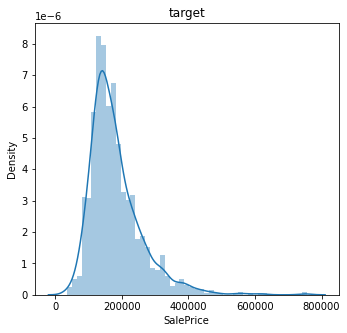

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(y, label='target')
plt.title('target')

plt.show()

Видим, что распределения несимметричные с тяжёлыми правыми хвостами.

Если разбирать линейную регрессию c MSE ошибкой с [вероятностной](https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/seminars/sem04-linregr.pdf) точки зрения, то можно получить, что шум должен быть распределён нормально. Поэтому лучше, когда целевая переменная распределена также нормально.

Если прологарифмировать целевую переменную, то её распределение станет больше похоже на нормальное:

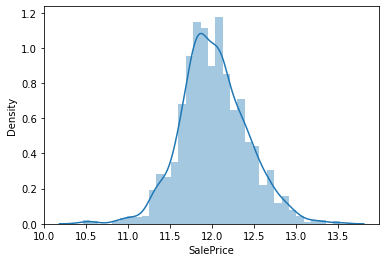

In [ ]:
sns.distplot(np.log(y+1), label='target')
plt.show()

Сравним качество линейной регрессии в двух случаях:
1. Целевая переменная без изменений.
2. Целевая переменная прологарифмирована.

Не забудем вернуть во втором случае взять экспоненту от предсказаний!

In [ ]:
def train_model(X_train, y_train):
    alphas = np.logspace(-2, 3, 10)
    searcher = GridSearchCV(Ridge(), [{'alpha': alphas}],
                            scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
    searcher.fit(X_train, np.log(y_train+1))

    best_alpha = searcher.best_params_["alpha"]
    print("Best alpha = %.4f" % best_alpha)

    return searcher.best_estimator_.fit(X_train, y_train)

In [ ]:
model = train_model(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Best alpha = 21.5443
Train RMSE = 34823.9864
Test RMSE = 34068.8463


In [ ]:
model = train_model(X_train, np.log(y_train+1))

y_pred_train = np.exp(model.predict(X_train)) - 1
y_pred_test = np.exp(model.predict(X_test)) - 1

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Best alpha = 21.5443
Train RMSE = 38147.4237
Test RMSE = 29230.4326


Попробуем аналогично логарифмировать один из признаков, имеющих также смещённое распределение (этот признак был вторым по важности!)

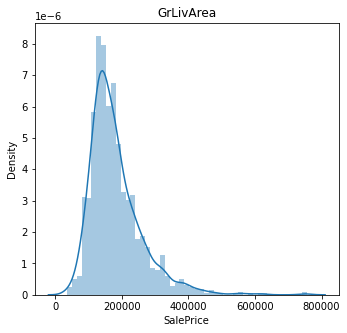

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(y, label='GrLivArea')
plt.title('GrLivArea')

plt.show()

In [ ]:
X_train.GrLivArea = np.log(X_train.GrLivArea + 1)
X_test.GrLivArea = np.log(X_test.GrLivArea + 1)

In [ ]:
model = train_model(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Best alpha = 0.0100
Train RMSE = 34781.6496
Test RMSE = 33967.9876


In [ ]:
model = train_model(X_train, np.log(y_train+1))

y_pred_train = np.exp(model.predict(X_train)) - 1
y_pred_test = np.exp(model.predict(X_test)) - 1

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Best alpha = 0.0100
Train RMSE = 33553.2647
Test RMSE = 31070.1888


Как видим, логарифмирование признака уменьшило ошибку на тренировочной выборке, но на тестовой выборке ошибка увеличилась.

## Категориальные признаки

In [ ]:
# ! pip install category_encoders

In [ ]:
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [ ]:
numeric = list(X_train.select_dtypes(include=np.number).columns)
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

In [ ]:
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

numeric_data_mean = X_train[numeric_features].mean()
X_train[numeric] = X_train[numeric].fillna(numeric_data_mean)
X_test[numeric] = X_test[numeric].fillna(numeric_data_mean)

### One Hot Encoder

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

In [ ]:
alphas = np.logspace(-2, 5, 10)
searcher = GridSearchCV(pipeline, [{'regression__alpha': alphas}],
                        scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
searcher.fit(X_train, np.log(y_train+1))

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 100000.0000


In [ ]:
model = searcher.best_estimator_

y_pred_train = np.exp(model.predict(X_train)) - 1
y_pred_test = np.exp(model.predict(X_test)) - 1

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Train RMSE = 56930.9085
Test RMSE = 36562.8777


In [ ]:
print('Features before OHE:', len(numeric) + len(categorical))
print('Features after OHE:', len(model['regression'].coef_))

Features before OHE: 79
Features after OHE: 299


Видим, что OHE кодирование признаков привело к колоссальному переобучению, попробуем что-нибудь умнее.

### Счетчики (mean target encoding)

При кодировании категориального признака каждое его значение будем заменять на среднее значение целевой переменной для всех объектов с такой категорией.

$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell}\left[f_j(x)=f_j\left(x_i\right)\right] y_i}{\sum_{i=1}^{\ell}\left[f_j(x)=f_j\left(x_i\right)\right]}
$$

In [ ]:
column_transformer = ColumnTransformer([
    ('te', TargetEncoder(smoothing=1.0), categorical)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scale', column_transformer),
    ('regression', Ridge())
])

In [ ]:
alphas = np.logspace(-2, 3, 10)
searcher = GridSearchCV(pipeline, [{'regression__alpha': alphas}],
                        scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
searcher.fit(X_train, np.log(y_train+1))

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 5.9948


In [ ]:
model = searcher.best_estimator_

y_pred_train = np.exp(model.predict(X_train)) - 1
y_pred_test = np.exp(model.predict(X_test)) - 1

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train) ** 0.5)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test) ** 0.5)

Train RMSE = 29544.4295
Test RMSE = 26965.3038


Гораздо лучше!

## Транзакционные данные

Напоследок посмотрим, как можно извлекать признаки из транзакционных данных.

Транзакционные данные характеризуются тем, что есть много строк, характеризующихся моментов времени и некоторым числом (суммой денег, например). При этом если это банк, то каждому человеку принадлежит не одна транзакция, а чаще всего надо предсказывать некоторые сущности для клиентов. Таким образом, надо получить признаки для пользователей из множества их транзакций. Этим мы и займёмся.

Для примера возьмём данные [отсюда](https://www.kaggle.com/regivm/retailtransactiondata/). Задача детектирования фродовых клиентов.

In [ ]:
!wget  -O 'Retail_Data_Response.csv' -q 'https://www.dropbox.com/s/le9icl9syo22thh/Retail_Data_Response.csv?dl=0'
!wget  -O 'Retail_Data_Transactions.csv' -q 'https://www.dropbox.com/s/obsxryxpfsdz3ut/Retail_Data_Transactions.csv?dl=0'

In [ ]:
customers = pd.read_csv('Retail_Data_Response.csv')
transactions = pd.read_csv('Retail_Data_Transactions.csv')

In [ ]:
customers.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [ ]:
transactions.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [ ]:
transactions.trans_date = transactions.trans_date.apply(
    lambda x: datetime.datetime.strptime(x, '%d-%b-%y'))

Посмотрим на распределение целевой переменной:

In [ ]:
customers.response.mean()

0.09398605461940732

Получаем примерно 1 к 9 положительных примеров. Если такие данные разбивать на части для кросс валидации, то может получиться так, что в одну из частей попадёт слишком мало положительных примеров, а в другую — наоборот. На случай такого неравномерного баланса классов есть StratifiedKFold, который бьёт данные так, чтобы баланс классов во всех частях был одинаковым.

In [ ]:
from sklearn.model_selection import StratifiedKFold

Когда строк на каждый объект много, можно считать различные статистики. Например, средние, минимальные и максимальные суммы, потраченные клиентом, количество транзакий, ...

In [ ]:
agg_transactions = transactions.groupby('customer_id').tran_amount.agg(
    ['mean', 'std', 'count', 'min', 'max']).reset_index()

data = pd.merge(customers, agg_transactions, how='left', on='customer_id')

data.head()

,customer_id,response,mean,std,count,min,max
0,CS1112,0,67.466667,19.766012,15,36,105
1,CS1113,0,74.500000,21.254102,20,36,98
2,CS1114,1,75.368421,21.341692,19,37,105
3,CS1115,1,75.409091,18.151896,22,41,104
4,CS1116,1,65.923077,22.940000,13,40,105


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(
    LogisticRegression(solver='newton-cg'),
    X=data.drop(['customer_id', 'response'], axis=1),
    y=data.response,
    cv=StratifiedKFold(n_splits=3),
    scoring='roc_auc'))

0.7138460124535347

Но каждая транзакция снабжена датой! Можно посчитать статистики только по свежим транзакциям. Добавим их.

In [ ]:
transactions.trans_date.min(), transactions.trans_date.max()

(Timestamp('2011-05-16 00:00:00'), Timestamp('2015-03-16 00:00:00'))

In [ ]:
agg_transactions = transactions.loc[transactions.trans_date.apply(
    lambda x: x.year == 2014)].groupby('customer_id').tran_amount.agg(
    ['mean', 'std', 'count', 'min', 'max']).reset_index()

In [ ]:
data = pd.merge(data, agg_transactions, how='left', on='customer_id', suffixes=('', '_2014'))
data = data.fillna(0)

In [ ]:
np.mean(cross_val_score(
    LogisticRegression(solver='newton-cg'),
    X=data.drop(['customer_id', 'response'], axis=1),
    y=data.response,
    cv=StratifiedKFold(n_splits=3),
    scoring='roc_auc'))

0.7492944117908228

Можно также считать дату первой и последней транзакциями пользователей, среднее время между транзакциями и прочее.

**На заметку:** Эти материалы были взяты из курса "Машинное обучение 1", ПМИ ВШЭ.